In [12]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests


from citipy import citipy
from config import weather_api_key

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [13]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [14]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [15]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-36.99783941936481 -100.28197909844273
-40.55759392625511 67.56118692465986
-39.35002256969421 45.57114956861611
78.66148023425902 116.74478319511172
-46.50349121528848 -43.467335142657646
-79.45777966577724 52.02387868022825
43.33870952722549 -116.25350906003501
-66.6496658220628 14.511743930007583
-8.517303695127751 -99.20172341177408
85.77154163806341 34.317286355710536
85.38077538579859 -60.539995898382486
4.0284346368106725 -164.98969512847347
-4.7482577815256946 -17.886838951547986
-35.23838921516965 -8.667021505614343
-29.235108543485936 146.7060150839971
-34.39995497185737 -57.06794134339931
-71.19102753385985 21.68064959841857
0.7976261893387004 7.379191761090539
-31.521492422485935 -107.56021712217074
46.60170629121751 -102.8134685752855
-63.686535752472 -149.19957065559157
33.37274102126139 107.28902296814005
41.23419301783889 -156.40541550337755
-85.53423128163146 109.67497845594687
-66.7751027664244 -53.323601929421955
27.740156603140107 -132.11499411570946
18.348436123043

-71.49126655781295 110.05018836643274
60.69168540384058 108.50296574145386
-53.81412452974071 50.52229550679144
61.92979395281836 -75.35791526671854
50.01306928106956 104.17850806099273
75.10096444859539 79.78228512251798
-71.5331138343297 -176.60348187626806
-36.46615038068971 -140.90726866976132
-21.06852095456196 19.078154347507734
-62.85014997044344 152.56754146059717
54.88989654318766 163.79282384897994
-68.4787946002146 171.20835364488846
77.52999055742049 -40.7923162751982
-76.61918139476617 -179.98804819742037
53.69250670106504 -135.11400429157788
-15.591310016157422 64.09783633251394
-33.33935671037558 -168.97636311410008
7.940567676139153 117.64647096559793
3.6620461938350246 -22.163637205595364
44.236687173671385 86.99300542650758
74.07095891857566 5.136795530920267
-38.34720210303209 -32.59468994301761
29.658612252500305 -71.35205096785144
45.885859800703685 -163.65512677689858
1.5784873399173307 -79.10424629137334
51.28089680428022 40.40819010901333
45.13172428313206 -73.6

79.46820633635011 -138.500122825944
74.15491060884071 161.33766775517017
58.081338853511966 143.43615928622
-54.88215021989855 10.58628453765536
-87.99246792560437 -142.74566882962387
-37.789831418338096 23.653332854873668
59.942864974725836 -130.3697540573295
28.672514931413033 -128.42394746174625
-25.457101691341748 -39.4517961025374
68.09823897242495 118.62029636565984
-55.344001331029524 8.990978503795702
-79.1933753463883 -8.01976000522481
-13.790389240332416 85.78507068826849
-58.00631227302645 -133.05924004731565
-65.3207372677981 -40.570115978644935
77.92356218289086 37.32253425094251
-18.1883749116912 -55.408694449039785
-65.53085556555489 -174.49459591559003
76.18697110254803 88.43327848781223
-81.54298918261912 -92.27589828523882
-85.9975739219131 4.260381126977023
67.5840606668616 -69.8327972219083
-0.7946593947366409 -144.49564716595518
-6.366146876090085 37.50853646235973
-5.466984934902456 49.202292182247504
-56.91388641521623 141.1368616732072
-19.99894563187175 92.1576

In [18]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

'souillac'

In [19]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lebu
Processing Record 2 of Set 1 | souillac
Processing Record 3 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 4 of Set 1 | saskylakh
Processing Record 5 of Set 1 | rocha
Processing Record 6 of Set 1 | port alfred
Processing Record 7 of Set 1 | kuna
Processing Record 8 of Set 1 | hermanus
Processing Record 9 of Set 1 | puerto ayora
Processing Record 10 of Set 1 | vardo
Processing Record 11 of Set 1 | narsaq
Processing Record 12 of Set 1 | hilo
Processing Record 13 of Set 1 | georgetown
Processing Record 14 of Set 1 | jamestown
Processing Record 15 of Set 1 | moree
Processing Record 16 of Set 1 | nueva helvecia
Processing Record 17 of Set 1 | bredasdorp
Processing Record 18 of Set 1 | port-gentil
Processing Record 19 of Set 1 | rikitea
Processing Record 20 of Set 1 | dickinson
Processing Record 21 of Set 1 | mataura
Processing Record 22 of Set 1 | hanzhong
Processing Record 23 

Processing Record 39 of Set 4 | taoudenni
Processing Record 40 of Set 4 | cherskiy
Processing Record 41 of Set 4 | gravelbourg
Processing Record 42 of Set 4 | padang
Processing Record 43 of Set 4 | banmo
City not found. Skipping...
Processing Record 44 of Set 4 | lorengau
Processing Record 45 of Set 4 | puerto carreno
Processing Record 46 of Set 4 | ribeira grande
Processing Record 47 of Set 4 | nanortalik
Processing Record 48 of Set 4 | vila velha
Processing Record 49 of Set 4 | victoria
Processing Record 50 of Set 4 | mangrol
Processing Record 1 of Set 5 | aswan
Processing Record 2 of Set 5 | bilibino
Processing Record 3 of Set 5 | sabinas hidalgo
Processing Record 4 of Set 5 | henties bay
Processing Record 5 of Set 5 | kapaa
Processing Record 6 of Set 5 | san patricio
Processing Record 7 of Set 5 | nogales
Processing Record 8 of Set 5 | acarau
Processing Record 9 of Set 5 | boddam
Processing Record 10 of Set 5 | kavaratti
Processing Record 11 of Set 5 | buraydah
Processing Record 12

Processing Record 24 of Set 8 | petropavlovsk-kamchatskiy
Processing Record 25 of Set 8 | birin
Processing Record 26 of Set 8 | kidal
Processing Record 27 of Set 8 | bacuit
City not found. Skipping...
Processing Record 28 of Set 8 | dunedin
Processing Record 29 of Set 8 | zhigansk
Processing Record 30 of Set 8 | kristiansund
Processing Record 31 of Set 8 | ajdabiya
Processing Record 32 of Set 8 | magan
Processing Record 33 of Set 8 | lovington
Processing Record 34 of Set 8 | laguna
Processing Record 35 of Set 8 | sarakhs
Processing Record 36 of Set 8 | patacamaya
Processing Record 37 of Set 8 | san javier
Processing Record 38 of Set 8 | kushima
Processing Record 39 of Set 8 | atambua
Processing Record 40 of Set 8 | hovd
Processing Record 41 of Set 8 | leningradskiy
Processing Record 42 of Set 8 | marica
Processing Record 43 of Set 8 | cayenne
Processing Record 44 of Set 8 | fortuna
Processing Record 45 of Set 8 | aykhal
Processing Record 46 of Set 8 | general roca
Processing Record 47 

Processing Record 9 of Set 12 | san felipe
Processing Record 10 of Set 12 | namatanai
Processing Record 11 of Set 12 | rengasdengklok
Processing Record 12 of Set 12 | fare
Processing Record 13 of Set 12 | cochrane
Processing Record 14 of Set 12 | ilulissat
Processing Record 15 of Set 12 | moranbah
Processing Record 16 of Set 12 | bukachacha
Processing Record 17 of Set 12 | coihaique
Processing Record 18 of Set 12 | iralaya
Processing Record 19 of Set 12 | high level
Processing Record 20 of Set 12 | lavrentiya
Processing Record 21 of Set 12 | bose
Processing Record 22 of Set 12 | ngukurr
City not found. Skipping...
Processing Record 23 of Set 12 | crixas
Processing Record 24 of Set 12 | margate
Processing Record 25 of Set 12 | oktyabrskiy
Processing Record 26 of Set 12 | ulladulla
Processing Record 27 of Set 12 | yurimaguas
Processing Record 28 of Set 12 | businga
Processing Record 29 of Set 12 | nantucket
Processing Record 30 of Set 12 | dongtai
Processing Record 31 of Set 12 | vostok


In [20]:
len(city_data)

565

In [21]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Lebu,-37.6167,-73.6500,54.00,83,82,14.16,CL,2022-10-16 20:30:11
1,Souillac,-20.5167,57.5167,71.98,83,40,5.75,MU,2022-10-16 20:30:11
2,Saskylakh,71.9167,114.0833,16.54,92,66,16.08,RU,2022-10-16 20:30:12
3,Rocha,-34.4833,-54.3333,57.61,92,86,12.97,UY,2022-10-16 20:30:13
4,Port Alfred,-33.5906,26.8910,66.18,92,100,20.56,ZA,2022-10-16 20:30:13
5,Kuna,43.4918,-116.4201,72.95,26,0,4.61,US,2022-10-16 20:29:30
6,Hermanus,-34.4187,19.2345,62.80,88,6,6.04,ZA,2022-10-16 20:30:14
7,Puerto Ayora,-0.7393,-90.3518,76.96,86,85,5.01,EC,2022-10-16 20:30:15
8,Vardo,70.3705,31.1107,42.78,87,75,13.80,NO,2022-10-16 20:30:15
9,Narsaq,60.9167,-46.0500,32.22,72,10,6.51,GL,2022-10-16 20:30:16


In [23]:
new_column_order=["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]

city_data_df=city_data_df[new_column_order]

city_data_df.tail()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
560,Kulhudhuffushi,MV,2022-10-16 20:46:29,6.6221,73.0700,80.37,82,100,20.24
561,Brigantine,US,2022-10-16 20:46:29,39.4101,-74.3646,70.02,44,0,4.61
562,Sorong,ID,2022-10-16 20:46:29,-0.8833,131.2500,77.97,86,100,4.72
563,Wanaka,NZ,2022-10-16 20:46:30,-44.7000,169.1500,54.10,62,7,3.00
564,Thunder Bay,CA,2022-10-16 20:42:09,48.4001,-89.3168,42.78,81,100,6.91


In [24]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [25]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

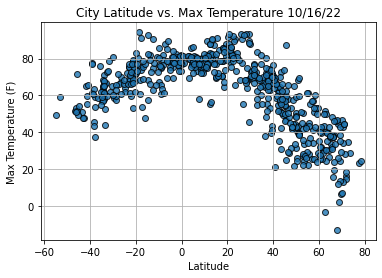

In [27]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

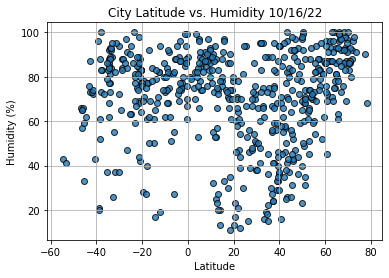

In [28]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

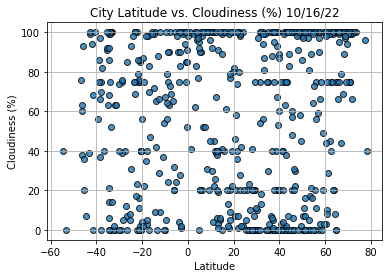

In [29]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

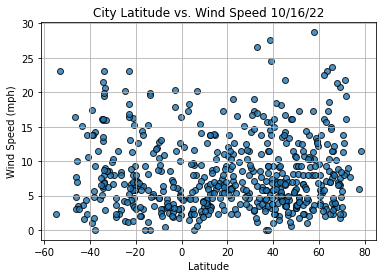

In [30]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [37]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.

def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [39]:
# ALL DATA IN A ROW OF CITY_DATA_DF

index13 = city_data_df.loc[13]
index13

City                        Moree
Country                        AU
Date          2022-10-16 20:30:17
Lat                      -29.4667
Lng                        149.85
Max Temp                    58.48
Humidity                       65
Cloudiness                      0
Wind Speed                   7.92
Name: 13, dtype: object

In [40]:
# RETURNS TRUE FOR ALL ROWS IN LAT COLUMN OF A DATAFRAME THAT MEET CONDITION

city_data_df["Lat"] >= 0

0      False
1      False
2       True
3      False
4      False
       ...  
560     True
561     True
562    False
563    False
564     True
Name: Lat, Length: 565, dtype: bool

In [41]:
# RETURNS ALL ROWS THAT ARE TRUE ACCORDING TO ABOVE LOGIC

city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Saskylakh,RU,2022-10-16 20:30:12,71.9167,114.0833,16.54,92,66,16.08
5,Kuna,US,2022-10-16 20:29:30,43.4918,-116.4201,72.95,26,0,4.61
8,Vardo,NO,2022-10-16 20:30:15,70.3705,31.1107,42.78,87,75,13.80
9,Narsaq,GL,2022-10-16 20:30:16,60.9167,-46.0500,32.22,72,10,6.51
10,Hilo,US,2022-10-16 20:30:16,19.7297,-155.0900,83.25,78,100,5.75


In [43]:
# Create Northern and Southern Hemisphere DataFrames.

northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

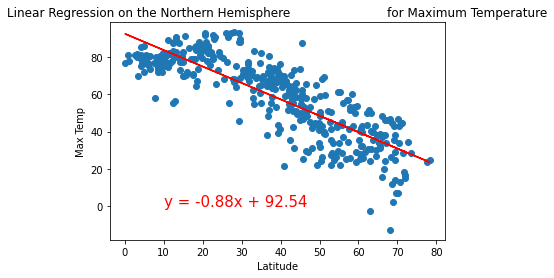

In [45]:
# Linear regression on the Northern Hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,0))

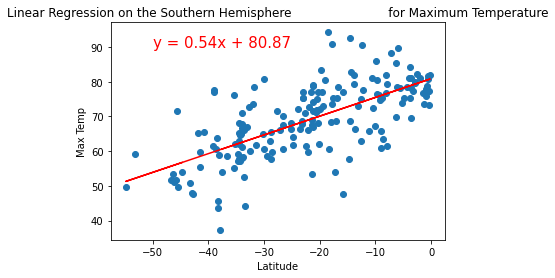

In [46]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

In [54]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values,y_values)

p_value

1.6091409399050063e-25

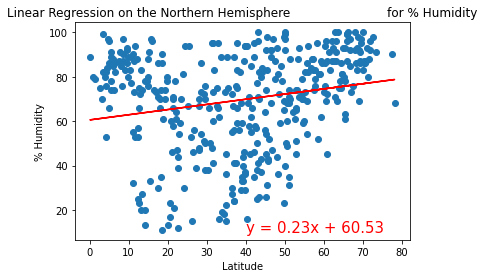

In [55]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

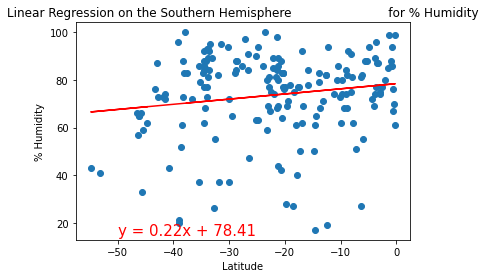

In [56]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

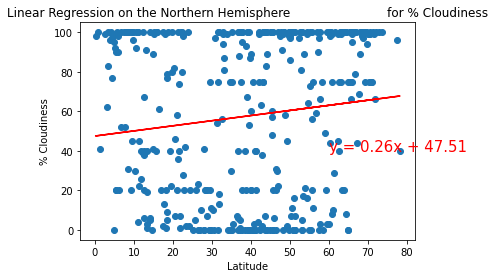

In [63]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(60,40))

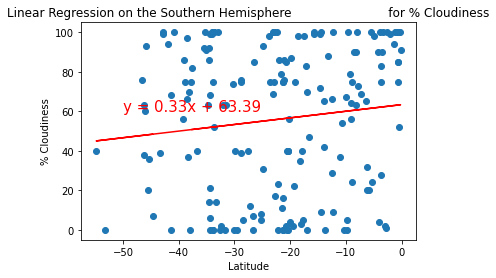

In [64]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

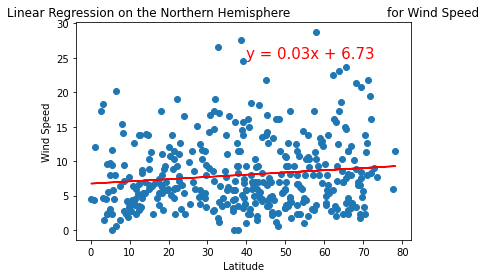

In [66]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,25))

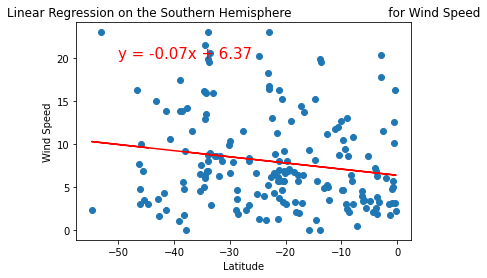

In [68]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,20))